In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import funEnsemble
import funEnsemble.functional_ensemble_clustering as ec
import fda_results as fr
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
from FDApy.clustering.fcubt import Node, FCUBT
from FDApy.representation.functional_data import DenseFunctionalData
import os

os.environ["R_HOME"] = r"C:\Program Files\R\R-4.2.2" # change as needed

%reload_ext rpy2.ipython

# Load packages
%R library(fda)
%R library(funHDDC)
%R library(funFEM)
%R library(mclust)
%R library(tidyverse)
%R library(rlang)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    # L2 distance (Squared Euclidian) where σ = 1
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import funEnsemble
import funEnsemble.functional_ensemble_clustering as ec
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
from FDApy.clustering.fcubt import Node, FCUBT
from FDApy.representation.functional_data import DenseFunctionalData
import os

os.environ["R_HOME"] = r"C:\Program Files\R\R-4.2.2" # change as needed

%reload_ext rpy2.ipython

# Load packages
%R library(fda)
%R library(funHDDC)
%R library(funFEM)
%R library(mclust)
%R library(tidyverse)
%R library(rlang)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    # L2 distance (Squared Euclidian) where σ = 1
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

In [6]:
def scenario_one_simulate():

    # Sample from the Gaussian process distribution
    nb_of_samples = 30  # Number of points in each function
    # Independent variable samples
    t = np.expand_dims(np.linspace(0, 8, nb_of_samples), 1)
    Σ = exponentiated_quadratic(t, t)  # Kernel of data points

    # Create different curves
    mean_curve = np.zeros((4, len(t)))
    mean_curve[0] = np.reshape(-8*np.sin(t)*np.log(t+2), (nb_of_samples))
    mean_curve[1] = np.reshape(4*np.cos(t)*np.log(t+0.5), (nb_of_samples))
    mean_curve[2] = np.reshape(-2-4*np.cos(t)*(np.sqrt(5*t+0.5)), (nb_of_samples))
    mean_curve[3] = np.reshape(5*np.cos(2*t)*np.log(t+0.5)*(np.sqrt(t+0.5)), (nb_of_samples))

    mixture_k = [0.2, 0.2, 0.5, 0.1]
    n = 100
    Y = np.zeros((n, len(t)))
    simulation_label = np.zeros(n)

    for i in range(n):
        # generate a random number between 0 and 1
        r = np.random.rand()
        # find the index of the mixture component
        if r < mixture_k[0]:
            # draw for the first component
            ys = np.random.multivariate_normal(
            mean=mean_curve[0], cov=Σ, 
            size=1)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 0

        elif r < mixture_k[0] + mixture_k[1]:
            # draw for the second component
            # draw for the first component
            ys = np.random.multivariate_normal(
            mean=mean_curve[1], cov=Σ, 
            size=1)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 1
        
        elif r < mixture_k[0] + mixture_k[1] + mixture_k[2]:
            # draw for the first component
            ys = np.random.multivariate_normal(
            mean=mean_curve[2], cov=Σ, 
            size=1)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 2

        else:
            # draw for the first component
            ys = np.random.multivariate_normal(
            mean=mean_curve[3], cov=Σ, 
            size=1)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 3

    return Y, simulation_label

In [7]:
def scenario_two_simulate():

    # Sample from the Gaussian process distribution
    nb_of_samples = 30  # Number of points in each function
    # Independent variable samples
    t = np.expand_dims(np.linspace(0, 8, nb_of_samples), 1)
    Σ = exponentiated_quadratic(t, t)  # Kernel of data points

    # Create different curves
    mean_curve = np.zeros((4, len(t)))
    mean_curve[0] = np.reshape(np.sin(t)*np.log(t+2), (nb_of_samples))
    mean_curve[1] = np.reshape(np.cos(t)*np.log(t+0.5), (nb_of_samples))
    mean_curve[2] = np.reshape(np.cos(t)*(np.sqrt(5*t+0.5)), (nb_of_samples))
    mean_curve[3] = np.reshape(np.cos(2*t)*np.log(t+0.5)*(np.sqrt(t+0.5)), (nb_of_samples))

    mixture_k = [1/4, 1/4, 1/4, 1/4	]
    n = 500
    Y = np.zeros((n, len(t)))
    simulation_label = np.zeros(n)

    for i in range(n):
        # generate a random number between 0 and 1
        r = np.random.rand()
        # find the index of the mixture component
        if r < mixture_k[0]:
            # draw for the first component
            ys = np.random.multivariate_normal(
            mean=mean_curve[0], cov=Σ, 
            size=1)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 0

        elif r < mixture_k[0] + mixture_k[1]:
            # draw for the second component
            # draw for the first component
            ys = np.random.multivariate_normal(
            mean=mean_curve[1], cov=Σ, 
            size=1)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 1


        elif r < mixture_k[0] + mixture_k[1] + mixture_k[2]:
            # draw for the first component
            ys = np.random.multivariate_normal(
            mean=mean_curve[2], cov=Σ, 
            size=1)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 2

        else:
            # draw for the first component
            ys = np.random.multivariate_normal(
            mean=mean_curve[3], cov=Σ, 
            size=1)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 3

    return Y, simulation_label
    

In [8]:
def scenario_three_simulate():
    # Sample from the Gaussian process distribution
    nb_of_samples = 30  # Number of points in each function
    # Independent variable samples
    t = np.expand_dims(np.linspace(0, 20, nb_of_samples), 1)
    Σ = exponentiated_quadratic(t, t)  # Kernel of data points

    # Declare the mean curve
    mean_curve = np.zeros((2, len(t)))
    # Mean curve with white noise
    mean_curve[0] = np.reshape(0.25+np.sin(t), (nb_of_samples))
    mean_curve[1] = np.reshape(np.cos(t), (nb_of_samples))

    mixture_k = [0.5, 0.5]
    n = 100
    Y = np.zeros((n, len(t)))
    simulation_label = np.zeros(n)

    for i in range(n):
        # generate a random number between 0 and 1
        r = np.random.rand()
        # find the index of the mixture component
        if r < mixture_k[0]:
            # draw for the first component
            ys = np.random.multivariate_normal(mean=mean_curve[0], cov=Σ, size=1)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 0
        else:
            # draw for the first component
            ys = np.random.multivariate_normal(mean=mean_curve[1], cov=Σ, size=1)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 1
            
    return Y, simulation_label

        

In [9]:
def scenario_four_simulate():
    # Sample from the Gaussian process distribution
    nb_of_samples = 30  # Number of points in each function
    # Independent variable samples
    t = np.expand_dims(np.linspace(0, 20, nb_of_samples), 1)
    Σ = exponentiated_quadratic(t, t)  # Kernel of data points

    # Declare the mean curve
    mean_curve = np.zeros((2, len(t)))
    # Mean curve with white noise
    mean_curve[0] = np.reshape(6 - np.abs(t - 6), (nb_of_samples))
    mean_curve[1] = np.reshape(6 - np.abs(t - 9), (nb_of_samples))

    mixture_k = [0.6, 0.4]
    n = 100
    Y = np.zeros((n, len(t)))
    simulation_label = np.zeros(n)

    for i in range(n):
        # generate a random number between 0 and 1
        r = np.random.rand()
        # find the index of the mixture component
        if r < mixture_k[0]:
            # draw for the first component
            ys = -1+0.25*np.random.multivariate_normal(mean=mean_curve[0], cov=Σ, size=1) + 0.5*np.random.multivariate_normal(mean=mean_curve[1], cov=Σ, size=1) + np.random.normal(0, 0.125, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 0
        else:
            # draw for the first component
            ys = 0.5*np.random.multivariate_normal(mean=mean_curve[0], cov=Σ, size=1) + 0.25*np.random.multivariate_normal(mean=mean_curve[1], cov=Σ, size=1) + np.random.normal(0, 0.125, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 1

    return Y, simulation_label


In [10]:
def scenario_five_simulate():
    # Sample from the Gaussian process distribution
    nb_of_samples = 30  # Number of points in each function
    # Independent variable samples
    t = np.expand_dims(np.linspace(0, 20, nb_of_samples), 1)
    Σ = exponentiated_quadratic(t/0.5, t/12)  # Kernel of data points
    Σ2 = exponentiated_quadratic(t, t/12)  # Kernel of data points
    Σ3 = exponentiated_quadratic(t, t*2/3)  # Kernel of data points

    # Declare the mean curve
    mean_curve = np.zeros((3, len(t)))
    # Mean curve with white noise
    mean_curve[0] = np.reshape(6 - np.abs(t - 11), (nb_of_samples))
    mean_curve[1] = np.reshape(6 - np.abs(t - 7), (nb_of_samples))
    mean_curve[2] = np.reshape(6 - np.abs(t - 15), (nb_of_samples))


    mixture_k = [0.2, 0.5, 0.1, 0.4]
    n = 500
    Y = np.zeros((n, len(t)))
    simulation_label = np.zeros(n)

    for i in range(n):
        # generate a random number between 0 and 1
        r = np.random.rand()
        # find the index of the mixture component
        if r < mixture_k[0]:
            # draw for the first component
            ys = np.reshape(t/2, (nb_of_samples)) + np.random.multivariate_normal(mean=mean_curve[2], cov=Σ2, size=1) + np.random.multivariate_normal(mean=mean_curve[1], cov=Σ3, size=1) + np.random.normal(0, 0.125, len(t))*np.sqrt(0.1)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 0
        elif r < mixture_k[0] + mixture_k[1]:
            # draw for the first component
            ys = np.reshape(t/2, (nb_of_samples)) + np.random.multivariate_normal(mean=mean_curve[0], cov=Σ, size=1) + np.random.multivariate_normal(mean=mean_curve[1], cov=Σ2, size=1)  + np.random.normal(0, 0.125, len(t))*np.sqrt(0.5)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 1
        elif r < mixture_k[0] + mixture_k[1] + mixture_k[2]:
            # draw for the first component
            ys = np.random.multivariate_normal(mean=mean_curve[1], cov=Σ3, size=1)+ np.random.normal(0, 0.125, len(t))*np.sqrt(10)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 2
        else:
            # draw for the first component
            ys = np.random.multivariate_normal(mean=mean_curve[0], cov=Σ, size=1) + np.random.multivariate_normal(mean=mean_curve[2], cov=Σ, size=1) + np.random.normal(0, 0.125, len(t))*np.sqrt(0.5)
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 3

    return Y, simulation_label


In [11]:
def scenario_six_simulate():
    # Sample from the Gaussian process distribution
    nb_of_samples = 30  # Number of points in each function
    # Independent variable samples
    t = np.expand_dims(np.linspace(0, 50, nb_of_samples), 1)
    Σ = exponentiated_quadratic(t, t)  # Kernel of data point
    Σ2 = exponentiated_quadratic(5*t, 5*t)  # Kernel of data point
    Σ3 = exponentiated_quadratic(8*t, 8*t)  # Kernel of data point

    mixture_k = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
    n = 200
    Y = np.zeros((n, len(t)))
    simulation_label = np.zeros(n)

    for i in range(n):
        # generate a random number between 0 and 1
        r = np.random.rand()
        # find the index of the mixture component
        if r < mixture_k[0]:
            ys = np.reshape(t, (nb_of_samples)) + np.random.multivariate_normal(mean=np.reshape(np.cos(t/10), (nb_of_samples)), cov=Σ, size=1) + np.random.multivariate_normal(mean=np.reshape(np.sin(1 + t/10), (nb_of_samples)), cov=Σ, size=1) + np.random.normal(0, 0.125, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 0
        elif r < mixture_k[0] + mixture_k[1]:
            ys = np.reshape(t, (nb_of_samples)) + 2*np.random.multivariate_normal(mean=np.reshape(np.cos(2*t/10), (nb_of_samples)), cov=Σ, size=1) + 2*np.random.multivariate_normal(mean=np.reshape(np.sin(2 + t/10), (nb_of_samples)), cov=Σ, size=1) + np.random.normal(0, 0.125, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 1
        elif r < mixture_k[0] + mixture_k[1] + mixture_k[2]:
            ys = np.reshape(t, (nb_of_samples)) + 3*np.random.multivariate_normal(mean=np.reshape(np.cos(3*t/10), (nb_of_samples)), cov=Σ, size=1) + 3*np.random.multivariate_normal(mean=np.reshape(np.sin(3 + t/10), (nb_of_samples)), cov=Σ, size=1) + np.random.normal(0, 0.125, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 2
        elif r < mixture_k[0] + mixture_k[1] + mixture_k[2] + mixture_k[3]:
            ys = np.reshape(t, (nb_of_samples)) + np.random.multivariate_normal(mean=np.reshape(np.sin(t/10), (nb_of_samples)), cov=Σ, size=1) + np.random.multivariate_normal(mean=np.reshape(np.cos(1 + t/10), (nb_of_samples)), cov=Σ2, size=1) + np.random.multivariate_normal(mean=np.reshape(np.square(t/10)+t/10, (nb_of_samples)), cov=Σ3, size=1) + np.random.normal(0, 0.125, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 3
        elif r < mixture_k[0] + mixture_k[1] + mixture_k[2] + mixture_k[3] + mixture_k[4]:
            ys = np.reshape(t, (nb_of_samples))  + 2*np.random.multivariate_normal(mean=np.reshape(np.sin(2*t/10), (nb_of_samples)), cov=Σ, size=1) + 2*np.random.multivariate_normal(mean=np.reshape(np.cos(2 + t/10), (nb_of_samples)), cov=Σ2, size=1) + 2*np.random.multivariate_normal(mean=np.reshape(np.square(t/10)+t/10, (nb_of_samples)), cov=Σ3, size=1) + np.random.normal(0, 0.125, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 4
        else:
            ys = np.reshape(t, (nb_of_samples)) + 3*np.random.multivariate_normal(mean=np.reshape(np.sin(3*t/10), (nb_of_samples)), cov=Σ, size=1) + 3*np.random.multivariate_normal(mean=np.reshape(np.cos(3 + t/10), (nb_of_samples)), cov=Σ2, size=1) + 3*np.random.multivariate_normal(mean=np.reshape(np.square(t/10)+t/10, (nb_of_samples)), cov=Σ3, size=1) + np.random.normal(0, 0.125, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 5

    return Y, simulation_label

In [12]:
def scenario_seven_simulate():
    # Sample from the Gaussian process distribution
    nb_of_samples = 30  # Number of points in each function
    # Independent variable samples
    t = np.expand_dims(np.linspace(0, 20, nb_of_samples), 1)
    Σ = exponentiated_quadratic(t, t)  # Kernel of data points

    # Declare the mean curve
    mean_curve = np.zeros((3, len(t)))
    # Mean curve with white noise
    mean_curve[0] = np.reshape(np.cos(t), (nb_of_samples))
    mean_curve[1] = np.reshape(np.cos(t) -0.5*t, (nb_of_samples))
    mean_curve[2] = np.reshape(-0.5*t+0.5, (nb_of_samples))

    mixture_k = [1/2, 1/4, 1/4]
    n = 100
    Y = np.zeros((n, len(t)))
    simulation_label = np.zeros(n)

    for i in range(n):
        # generate a random number between 0 and 1
        r = np.random.rand()
        # find the index of the mixture component
        if r < mixture_k[0]:
            # draw for the first component
            ys = 1 + np.random.multivariate_normal(mean= mean_curve[0], cov=Σ, size=1) + np.random.normal(0, 0.2, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 0
        elif r < mixture_k[0] + mixture_k[1]:
            # draw for the first component
            ys = 2 + np.random.multivariate_normal(mean= mean_curve[1], cov=Σ, size=1) + np.random.normal(0, 0.2, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 1
        else:
            # draw for the first component
            ys = np.random.multivariate_normal(mean= mean_curve[2], cov=Σ, size=1) + np.random.normal(0, 0.2, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 2

    return Y, simulation_label

In [13]:
def scenario_eight_simulate():
    # Sample from the Gaussian process distribution
    nb_of_samples = 30  # Number of points in each function
    # Independent variable samples
    t = np.expand_dims(np.linspace(0, 20, nb_of_samples), 1)
    Σ = exponentiated_quadratic(t, t)  # Kernel of data points

    # Create different curves
    mean_curve = np.zeros((3, len(t)))
    mean_curve[0] = np.reshape(np.cos(1.5*np.pi*t), (nb_of_samples))
    mean_curve[1] = np.reshape(np.sin(1.5*np.pi*t), (nb_of_samples))
    mean_curve[2] = np.reshape(np.sin(np.pi*t), (nb_of_samples))

    mixture_k = [0.2, 0.6, 0.2]
    n = 100
    Y = np.zeros((n, len(t)))
    simulation_label = np.zeros(n)

    for i in range(n):
        # generate a random number between 0 and 1
        r = np.random.rand()
        # find the index of the mixture component
        if r < mixture_k[0]:
            # draw for the first component
            ys = - 5 + np.reshape(0.5*t, (nb_of_samples)) + np.random.multivariate_normal(mean=mean_curve[0], cov=Σ, size=1) + np.random.normal(0, 1, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 0

        elif r < mixture_k[0] + mixture_k[1]:
            # draw for the second component
            # draw for the first component
            ys = 5 + np.reshape(-0.5*t, (nb_of_samples)) + np.random.multivariate_normal(mean=mean_curve[1], cov=Σ, size=1) + np.random.normal(0, 2, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 1

        else:
            # draw for the first component
            ys = np.random.multivariate_normal(mean=mean_curve[2], cov=Σ, size=1) + np.random.normal(0, 3, len(t))
            Y[i] = ys
            # Remember the label of the component
            simulation_label[i] = 2

    return Y, simulation_label


In [14]:
def eigen_dimension_selection(variance):
    V = 0
    # Determine the Eigen Dimension that explains 95% of the variance
    for i in range(len(variance)):
        if sum(variance[:i]) >= 0.95:
            V = i - 1
            break
    if V == 0:
        V = 1
    return V

In [15]:
# Make t a dict (for fcubt)
t = np.expand_dims(np.linspace(0, 20, 30), 1)
t = {'input_dim_0': t}
t = {k: v.squeeze() for k, v in t.items()}

In [16]:
runs = 100

AMI_funensemble, ARI_funensemble, AMI_fCUBT, ARI_fCUBT, AMI_funFEM, ARI_funFEM, AMI_funHDDC, ARI_funHDDC = [], [], [], [], [], [], [], []

for i in range(runs):
    
    # Get data from the first simulation
    Y, simulation_label = scenario_one_simulate()

    # Dimension selection
    variance, ami, ari, v_range = fr.percentage_variation_ami_ari(10, Y, 150, simulation_label, 4)
    dimension = eigen_dimension_selection(variance)	

    # funEnsemble
    data_smooth, mean, principal_componenets, eigen_functions = ec.functional_data_decomposition (Y, dimension, 150)
    membership_matrices, labels = ec.functional_data_clustering (principal_componenets, 4)
    # Append the AMI and ARI to the array
    AMI_funensemble = np.append(AMI_funensemble, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funensemble = np.append(ARI_funensemble, adjusted_rand_score(simulation_label, labels))

    # fCUBT
    data = DenseFunctionalData(t, Y)
    # Build the tree
    root_node = Node(data, is_root=True)
    fcubt = FCUBT(root_node=root_node)
    # Growing
    fcubt.grow(n_components=0.95, min_size=10)
    # Joining
    fcubt.join(n_components=0.95)
    # Append the AMI and ARI to the array
    AMI_fCUBT = np.append(AMI_fCUBT, adjusted_mutual_info_score(simulation_label, fcubt.labels_join))
    ARI_fCUBT = np.append(ARI_fCUBT, adjusted_rand_score(simulation_label, fcubt.labels_join))

    # funHDDC
    # Store the data in DataStore.csv
    np.savetxt('../Data/DataStore.csv', Y, delimiter=',') 
    # Load data
    %R argvals <- seq(0, 1, length.out = 30)
    %R values <- t(as.matrix(read.csv('~/ProjectDocs/Project_code/simuations/Data/DataStore.csv', header = FALSE))) # nolint
    # FunHDDC
    %R basis <- create.bspline.basis(rangeval = c(min(argvals), max(argvals)), nbasis = 25, norder = 3) # nolint
    %R data_fd <- smooth.basis(argvals = argvals, y = values, fdParobj = basis)$fd
    %R res_clust <- funHDDC(data_fd, K = 4, threshold = 0.3, model = 'ABQkDk', itermax = 2000, eps = 1e-3, init = 'kmeans') # nolint
    %R pred_labels <- res_clust$class
    # Write the pred_labels to a file
    %R write.csv(pred_labels, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read Labels from PredictedLabels.csv, ignoring the header and the first column
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=1)
    # Append the AMI and ARI to the array
    AMI_funHDDC = np.append(AMI_funHDDC, adjusted_mutual_info_score(simulation_label, predicted_labels))
    ARI_funHDDC = np.append(ARI_funHDDC, adjusted_rand_score(simulation_label, predicted_labels))

    # FunFEM
    %R res_clust = try(funFEM(data_fd,K=4)) # nolint # nolint: commas_linter.
    %R try(pred_labels_fem <- res_clust$P) # nolint
    # Write the pred_labels to a file
    %R write.csv(pred_labels_fem, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read labels from PredictedLabels.csv, ignoring the header and the first column and getting the first four columns
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=range(1, 5))
    #   Format the labels
    labels = np.zeros(len(predicted_labels))
    for i in range(len(predicted_labels)):
        labels[i] = np.argmax(predicted_labels[i])
    # Append the AMI and ARI to the array
    AMI_funFEM = np.append(AMI_funFEM, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funFEM = np.append(ARI_funFEM, adjusted_rand_score(simulation_label, labels))
    

    # Say that the run is done
    print("--------------- FINISHED RUN ---------------")

   model K threshold complexity           BIC
1 ABQKDK 4       0.3        564 -1,263,623.53

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        395 -1,801,696.37

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        355 -2,205,628.36

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        399 -3,305,896.55

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        396 -1,938,687.16

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
-----

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        378 -3,212,387.73

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        372 -1,879,509.61

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        396 -3,563,382.67

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        380 -325,389.18

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        247 -3,308,542.74

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        290 -127,931.82

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        332 -1,518,269.86

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        353 -1,885,168.05

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        377 -250,298.98

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        379 -269,768.74

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        355 -1,791,319.91

SELECTED: model  ABQKDK  with  4  clus

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        356 -2,239,920.62

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        378 -2,785,115.70

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        399 -301,761.04

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        401 -3,843,268.69

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        399 -404,721.40

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        417 -565,515.02

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        401 -3,805,919.33

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        378 -321,812.67

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        314 -1,767,538.94

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        378 -4,159,789.56

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        482 -656,853.70

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        310 -1,633,253.27

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        357 -2,186,803.60

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        505 -642,630.74

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        357 -1,491,176.08

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        395 -2,482,305.98

SELECTED: model  ABQKDK  with  4  

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        417 -1,624,213.40

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        355 -1,952,058.32

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        398 -1,854,564.16

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        312 -1,625,543.40

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        358 -4,329,989.41

SELECTED: model  ABQKDK  with 

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        463 -553,926.78

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        399 -314,934.09

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        335 -2,099,428.70

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        355 -2,950,223.71

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        376 -2,116,790.21

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        332 -1,736,700.82

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        353 -2,288,117.43

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        376 -2,505,057.62

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        291 -1,818,782.91

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        417 -2,530,674.98

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        313 -3,293,484.09

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        333 -1,713,195.88

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        357 -1,710,384.85

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        352 -3,738,622.82

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        355 -1,826,935.93

SELECTED: model  ABQKDK  with 

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        247 -1,447,397.80

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        376 -278,404.70

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        355 -281,815.72

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        401 -375,009.82

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        378 -3,467,701.25

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        372 -2,302,726.40

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        290 -2,832,296.73

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        423 -346,180.14

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        333 -1,940,912.26

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        335 -1,866,040.60

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        398 -1,987,132.23

SELECTED: model  ABQKDK  with  4  

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        290 -3,589,189.50

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        310 -2,372,165.06

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        418 -2,106,381.84

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        376 -3,351,269.03

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        333 -1,592,058.25

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        437 -3,885,633.12

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        269 -2,791,471.47

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        417 -1,943,299.42

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        503 -752,923.39

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        310 -1,965,885.06

SELECTED: model  ABQKDK  with  4  

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        422 -467,752.09

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        398 -2,159,720.65

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        269 -1,373,437.36

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        402 -367,115.08

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        353 -2,048,871.70

SELECTED: model  ABQKDK  with  4  clus

In [17]:
# Print the average AMI and ARI, rounded to 2
print("Average AMI funEnsemble: ", round(np.mean(AMI_funensemble), 2))
print("Average ARI funEnsemble: ", round(np.mean(ARI_funensemble), 2))
print("Average AMI fCUBT: ", round(np.mean(AMI_fCUBT), 2))
print("Average ARI fCUBT: ", round(np.mean(ARI_fCUBT), 2))
print("Average AMI funHDDC: ", round(np.mean(AMI_funHDDC), 2))
print("Average ARI funHDDC: ", round(np.mean(ARI_funHDDC), 2))
print("Average AMI funFEM: ", round(np.mean(AMI_funFEM), 2))
print("Average ARI funFEM: ", round(np.mean(ARI_funFEM), 2))

Average AMI funEnsemble:  0.95
Average ARI funEnsemble:  0.94
Average AMI fCUBT:  0.89
Average ARI fCUBT:  0.92
Average AMI funHDDC:  0.79
Average ARI funHDDC:  0.65
Average AMI funFEM:  0.57
Average ARI funFEM:  0.49


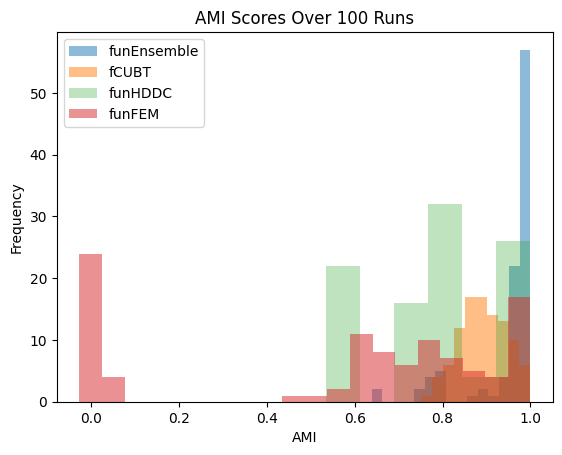

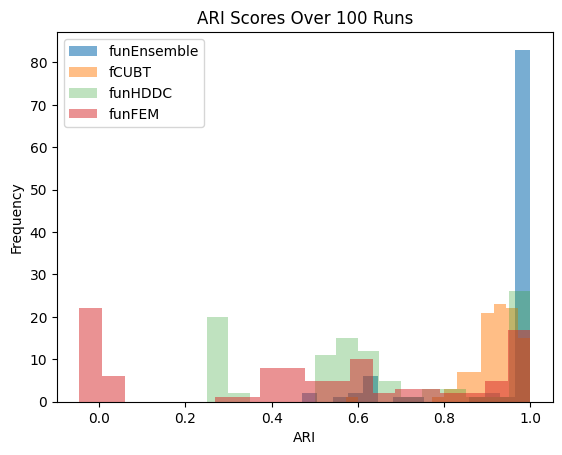

In [18]:
# Plot each AMI result in a histogram
plt.hist(AMI_funensemble, bins=15, alpha=0.5, label='funEnsemble')
plt.hist(AMI_fCUBT, bins=10, alpha=0.5, label='fCUBT')
plt.hist(AMI_funHDDC, bins=6, alpha=0.3, label='funHDDC')
plt.hist(AMI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('AMI Scores Over 100 Runs')
plt.xlabel('AMI')
plt.ylabel('Frequency')
plt.show()

# Plot each ARI result in a histogram
plt.hist(ARI_funensemble, bins=15, alpha=0.6, label='funEnsemble')
plt.hist(ARI_fCUBT, bins=15, alpha=0.5, label='fCUBT')
plt.hist(ARI_funHDDC, bins=15, alpha=0.3, label='funHDDC')
plt.hist(ARI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('ARI Scores Over 100 Runs')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()


In [19]:
runs = 100

AMI_funensemble, ARI_funensemble, AMI_fCUBT, ARI_fCUBT, AMI_funFEM, ARI_funFEM, AMI_funHDDC, ARI_funHDDC = [], [], [], [], [], [], [], []

for i in range(runs):
    
    # Get data from the first simulation
    Y, simulation_label = scenario_two_simulate()

    # Dimension selection
    variance, ami, ari, v_range = fr.percentage_variation_ami_ari(10, Y, 150, simulation_label, 4)
    dimension = eigen_dimension_selection(variance)	

    # funEnsemble
    data_smooth, mean, principal_componenets, eigen_functions = ec.functional_data_decomposition (Y, dimension, 150)
    membership_matrices, labels = ec.functional_data_clustering (principal_componenets, 4)
    # Append the AMI and ARI to the array
    AMI_funensemble = np.append(AMI_funensemble, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funensemble = np.append(ARI_funensemble, adjusted_rand_score(simulation_label, labels))

    # fCUBT
    data = DenseFunctionalData(t, Y)
    # Build the tree
    root_node = Node(data, is_root=True)
    fcubt = FCUBT(root_node=root_node)
    # Growing
    fcubt.grow(n_components=0.95, min_size=10)
    # Joining
    fcubt.join(n_components=0.95)
    # Append the AMI and ARI to the array
    AMI_fCUBT = np.append(AMI_fCUBT, adjusted_mutual_info_score(simulation_label, fcubt.labels_join))
    ARI_fCUBT = np.append(ARI_fCUBT, adjusted_rand_score(simulation_label, fcubt.labels_join))

    # funHDDC
    # Store the data in DataStore.csv
    np.savetxt('../Data/DataStore.csv', Y, delimiter=',') 
    # Load data
    %R argvals <- seq(0, 1, length.out = 30)
    %R values <- t(as.matrix(read.csv('~/ProjectDocs/Project_code/simuations/Data/DataStore.csv', header = FALSE))) # nolint
    # FunHDDC
    %R basis <- create.bspline.basis(rangeval = c(min(argvals), max(argvals)), nbasis = 25, norder = 3) # nolint
    %R data_fd <- smooth.basis(argvals = argvals, y = values, fdParobj = basis)$fd
    %R res_clust <- funHDDC(data_fd, K = 4, threshold = 0.3, model = 'ABQkDk', itermax = 2000, eps = 1e-3, init = 'kmeans') # nolint
    %R pred_labels <- res_clust$class
    # Write the pred_labels to a file
    %R write.csv(pred_labels, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read Labels from PredictedLabels.csv, ignoring the header and the first column
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=1)
    # Append the AMI and ARI to the array
    AMI_funHDDC = np.append(AMI_funHDDC, adjusted_mutual_info_score(simulation_label, predicted_labels))
    ARI_funHDDC = np.append(ARI_funHDDC, adjusted_rand_score(simulation_label, predicted_labels))

    # FunFEM
    %R res_clust = try(funFEM(data_fd,K=4)) # nolint # nolint: commas_linter.
    %R try(pred_labels_fem <- res_clust$P) # nolint
    # Write the pred_labels to a file
    %R write.csv(pred_labels_fem, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read labels from PredictedLabels.csv, ignoring the header and the first column and getting the first four columns
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=range(1, 5))
    #   Format the labels
    labels = np.zeros(len(predicted_labels))
    for i in range(len(predicted_labels)):
        labels[i] = np.argmax(predicted_labels[i])
    # Append the AMI and ARI to the array
    AMI_funFEM = np.append(AMI_funFEM, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funFEM = np.append(ARI_funFEM, adjusted_rand_score(simulation_label, labels))
    

    # Say that the run is done
    print("--------------- FINISHED RUN ---------------")

   model K threshold complexity           BIC
1 ABQKDK 4       0.3        442 -1,138,198.99

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        459 -830,071.72

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        564 -4,088,084.25

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        333 -704,462.94

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        439 -764,190.34

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- F

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        563 -3,439,169.58

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        564 -4,209,648.44

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        524 -2,571,182.57

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        542 -2,518,575.37

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        544 -3,408,407.83

SELECTED: model  ABQKDK  with 

In [20]:
# Print the average AMI and ARI, rounded to 2
print("Average AMI funEnsemble: ", round(np.mean(AMI_funensemble), 2))
print("Average ARI funEnsemble: ", round(np.mean(ARI_funensemble), 2))
print("Average AMI fCUBT: ", round(np.mean(AMI_fCUBT), 2))
print("Average ARI fCUBT: ", round(np.mean(ARI_fCUBT), 2))
print("Average AMI funHDDC: ", round(np.mean(AMI_funHDDC), 2))
print("Average ARI funHDDC: ", round(np.mean(ARI_funHDDC), 2))
print("Average AMI funFEM: ", round(np.mean(AMI_funFEM), 2))
print("Average ARI funFEM: ", round(np.mean(ARI_funFEM), 2))

Average AMI funEnsemble:  0.91
Average ARI funEnsemble:  0.93
Average AMI fCUBT:  0.87
Average ARI fCUBT:  0.8
Average AMI funHDDC:  0.89
Average ARI funHDDC:  0.85
Average AMI funFEM:  0.24
Average ARI funFEM:  0.17


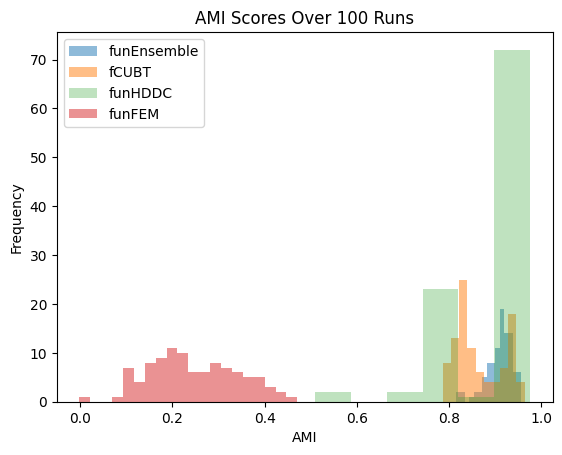

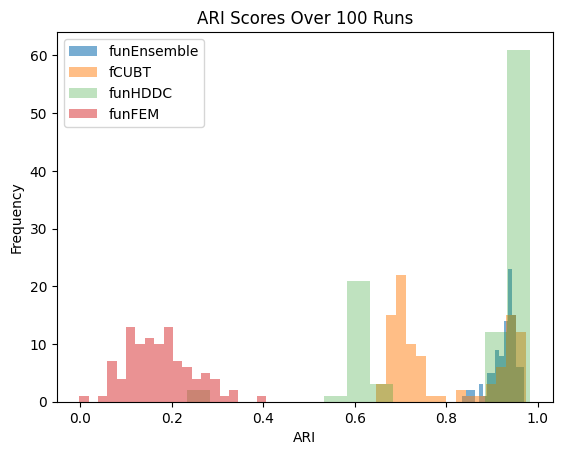

In [21]:
# Plot each AMI result in a histogram
plt.hist(AMI_funensemble, bins=15, alpha=0.5, label='funEnsemble')
plt.hist(AMI_fCUBT, bins=10, alpha=0.5, label='fCUBT')
plt.hist(AMI_funHDDC, bins=6, alpha=0.3, label='funHDDC')
plt.hist(AMI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('AMI Scores Over 100 Runs')
plt.xlabel('AMI')
plt.ylabel('Frequency')
plt.show()

# Plot each ARI result in a histogram
plt.hist(ARI_funensemble, bins=15, alpha=0.6, label='funEnsemble')
plt.hist(ARI_fCUBT, bins=15, alpha=0.5, label='fCUBT')
plt.hist(ARI_funHDDC, bins=15, alpha=0.3, label='funHDDC')
plt.hist(ARI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('ARI Scores Over 100 Runs')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()


In [22]:
runs = 100

AMI_funensemble, ARI_funensemble, AMI_fCUBT, ARI_fCUBT, AMI_funFEM, ARI_funFEM, AMI_funHDDC, ARI_funHDDC = [], [], [], [], [], [], [], []

for i in range(runs):
    
    # Get data from the first simulation
    Y, simulation_label = scenario_five_simulate()

    # Dimension selection
    variance, ami, ari, v_range = fr.percentage_variation_ami_ari(10, Y, 150, simulation_label, 4)
    dimension = eigen_dimension_selection(variance)	

    # funEnsemble
    data_smooth, mean, principal_componenets, eigen_functions = ec.functional_data_decomposition (Y, dimension, 150)
    membership_matrices, labels = ec.functional_data_clustering (principal_componenets, 4)
    # Append the AMI and ARI to the array
    AMI_funensemble = np.append(AMI_funensemble, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funensemble = np.append(ARI_funensemble, adjusted_rand_score(simulation_label, labels))

    # fCUBT
    data = DenseFunctionalData(t, Y)
    # Build the tree
    root_node = Node(data, is_root=True)
    fcubt = FCUBT(root_node=root_node)
    # Growing
    fcubt.grow(n_components=0.95, min_size=10)
    # Joining
    fcubt.join(n_components=0.95)
    # Append the AMI and ARI to the array
    AMI_fCUBT = np.append(AMI_fCUBT, adjusted_mutual_info_score(simulation_label, fcubt.labels_join))
    ARI_fCUBT = np.append(ARI_fCUBT, adjusted_rand_score(simulation_label, fcubt.labels_join))

    # funHDDC
    # Store the data in DataStore.csv
    np.savetxt('../Data/DataStore.csv', Y, delimiter=',') 
    # Load data
    %R argvals <- seq(0, 1, length.out = 30)
    %R values <- t(as.matrix(read.csv('~/ProjectDocs/Project_code/simuations/Data/DataStore.csv', header = FALSE))) # nolint
    # FunHDDC
    %R basis <- create.bspline.basis(rangeval = c(min(argvals), max(argvals)), nbasis = 25, norder = 3) # nolint
    %R data_fd <- smooth.basis(argvals = argvals, y = values, fdParobj = basis)$fd
    %R res_clust <- funHDDC(data_fd, K = 4, threshold = 0.3, model = 'ABQkDk', itermax = 2000, eps = 1e-3, init = 'kmeans') # nolint
    %R pred_labels <- res_clust$class
    # Write the pred_labels to a file
    %R write.csv(pred_labels, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read Labels from PredictedLabels.csv, ignoring the header and the first column
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=1)
    # Append the AMI and ARI to the array
    AMI_funHDDC = np.append(AMI_funHDDC, adjusted_mutual_info_score(simulation_label, predicted_labels))
    ARI_funHDDC = np.append(ARI_funHDDC, adjusted_rand_score(simulation_label, predicted_labels))

    # FunFEM
    %R res_clust = try(funFEM(data_fd,K=4)) # nolint # nolint: commas_linter.
    %R try(pred_labels_fem <- res_clust$P) # nolint
    # Write the pred_labels to a file
    %R write.csv(pred_labels_fem, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read labels from PredictedLabels.csv, ignoring the header and the first column and getting the first four columns
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=range(1, 5))
    #   Format the labels
    labels = np.zeros(len(predicted_labels))
    for i in range(len(predicted_labels)):
        labels[i] = np.argmax(predicted_labels[i])
    # Append the AMI and ARI to the array
    AMI_funFEM = np.append(AMI_funFEM, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funFEM = np.append(ARI_funFEM, adjusted_rand_score(simulation_label, labels))
    

    # Say that the run is done
    print("--------------- FINISHED RUN ---------------")

   model K threshold complexity           BIC
1 ABQKDK 4       0.3        387 -1,225,454.29

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        246 -769,735.00

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        399 -2,074,047.18

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        370 -1,390,235.99

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        247 -4,281,080.18

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
---------

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        333 -1,320,158.08

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        378 -1,869,294.71

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        315 -1,258,335.12

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        247 -3,485,005.10

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        352 -1,138,797.40

SELECTED: model  ABQKDK  with 

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        370 -1,078,461.24

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        313 -1,026,508.05

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        352 -1,116,172.00

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        370 -1,143,655.13

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        393 -1,666,418.36

SELECTED: model  ABQKDK  with 

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        390 -1,677,740.07

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        364 -891,742.89

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        434 -4,762,337.62

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        246 -4,284,161.40

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        433 -2,207,714.39

SELECTED: model  ABQKDK  with  4  

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        433 -1,693,883.48

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        375 -1,589,403.03

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        410 -1,557,158.65

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        270 -4,428,297.42

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        292 -1,091,217.09

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        329 -967,257.39

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        375 -1,376,076.20

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        333 -1,207,181.88

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        403 -1,292,956.19

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        315 -1,362,855.00

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        403 -1,092,871.78

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        409 -1,270,899.12

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        290 -1,091,407.71

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        270 -1,087,103.41

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        393 -1,693,136.73

SELECTED: model  ABQKDK  with 

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        352 -1,082,823.20

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        446 -5,805,769.90

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        370 -1,144,815.51

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        315 -1,261,040.32

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        387 -1,297,495.83

SELECTED: model  ABQKDK  with 

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 4) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        410 -1,369,967.89

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 4       0.3        347 -874,396.34

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        347 -5,589,534.12

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        387 -1,011,692.77

SELECTED: model  ABQKDK  with  4  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity           BIC
1 ABQKDK 4       0.3        269 -3,926,474.12

SELECTED: model  ABQKDK  with  4  

In [23]:
# Print the average AMI and ARI, rounded to 2
print("Average AMI funEnsemble: ", round(np.mean(AMI_funensemble), 2))
print("Average ARI funEnsemble: ", round(np.mean(ARI_funensemble), 2))
print("Average AMI fCUBT: ", round(np.mean(AMI_fCUBT), 2))
print("Average ARI fCUBT: ", round(np.mean(ARI_fCUBT), 2))
print("Average AMI funHDDC: ", round(np.mean(AMI_funHDDC), 2))
print("Average ARI funHDDC: ", round(np.mean(ARI_funHDDC), 2))
print("Average AMI funFEM: ", round(np.mean(AMI_funFEM), 2))
print("Average ARI funFEM: ", round(np.mean(ARI_funFEM), 2))

Average AMI funEnsemble:  0.87
Average ARI funEnsemble:  0.86
Average AMI fCUBT:  1.0
Average ARI fCUBT:  1.0
Average AMI funHDDC:  0.95
Average ARI funHDDC:  0.92
Average AMI funFEM:  0.81
Average ARI funFEM:  0.76


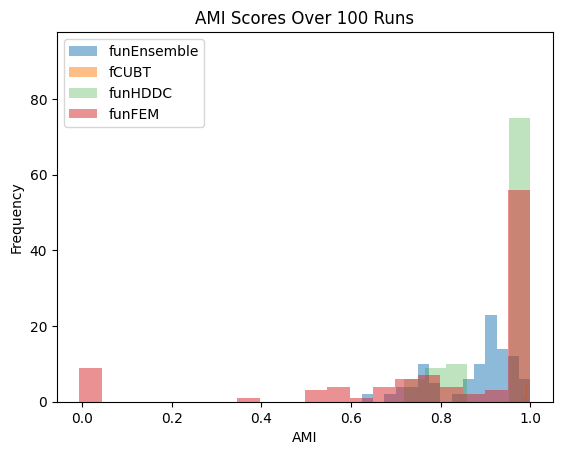

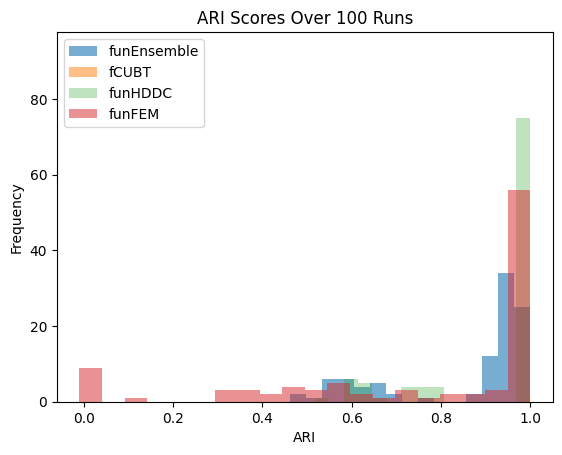

In [24]:
# Plot each AMI result in a histogram
plt.hist(AMI_funensemble, bins=15, alpha=0.5, label='funEnsemble')
plt.hist(AMI_fCUBT, bins=10, alpha=0.5, label='fCUBT')
plt.hist(AMI_funHDDC, bins=6, alpha=0.3, label='funHDDC')
plt.hist(AMI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('AMI Scores Over 100 Runs')
plt.xlabel('AMI')
plt.ylabel('Frequency')
plt.show()

# Plot each ARI result in a histogram
plt.hist(ARI_funensemble, bins=15, alpha=0.6, label='funEnsemble')
plt.hist(ARI_fCUBT, bins=15, alpha=0.5, label='fCUBT')
plt.hist(ARI_funHDDC, bins=15, alpha=0.3, label='funHDDC')
plt.hist(ARI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('ARI Scores Over 100 Runs')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()


In [25]:
runs = 100

AMI_funensemble, ARI_funensemble, AMI_fCUBT, ARI_fCUBT, AMI_funFEM, ARI_funFEM, AMI_funHDDC, ARI_funHDDC = [], [], [], [], [], [], [], []

for i in range(runs):
    
    # Get data from the first simulation
    Y, simulation_label = scenario_three_simulate()

    # Dimension selection
    variance, ami, ari, v_range = fr.percentage_variation_ami_ari(10, Y, 150, simulation_label, 2)
    dimension = eigen_dimension_selection(variance)	

    # funEnsemble
    data_smooth, mean, principal_componenets, eigen_functions = ec.functional_data_decomposition (Y, dimension, 150)
    membership_matrices, labels = ec.functional_data_clustering (principal_componenets, 2)
    # Append the AMI and ARI to the array
    AMI_funensemble = np.append(AMI_funensemble, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funensemble = np.append(ARI_funensemble, adjusted_rand_score(simulation_label, labels))

    # fCUBT
    data = DenseFunctionalData(t, Y)
    # Build the tree
    root_node = Node(data, is_root=True)
    fcubt = FCUBT(root_node=root_node)
    # Growing
    fcubt.grow(n_components=0.95, min_size=10)
    # Joining
    fcubt.join(n_components=0.95)
    # Append the AMI and ARI to the array
    AMI_fCUBT = np.append(AMI_fCUBT, adjusted_mutual_info_score(simulation_label, fcubt.labels_join))
    ARI_fCUBT = np.append(ARI_fCUBT, adjusted_rand_score(simulation_label, fcubt.labels_join))

    # funHDDC
    # Store the data in DataStore.csv
    np.savetxt('../Data/DataStore.csv', Y, delimiter=',') 
    # Load data
    %R argvals <- seq(0, 1, length.out = 30)
    %R values <- t(as.matrix(read.csv('~/ProjectDocs/Project_code/simuations/Data/DataStore.csv', header = FALSE))) # nolint
    # FunHDDC
    %R basis <- create.bspline.basis(rangeval = c(min(argvals), max(argvals)), nbasis = 25, norder = 3) # nolint
    %R data_fd <- smooth.basis(argvals = argvals, y = values, fdParobj = basis)$fd
    %R res_clust <- funHDDC(data_fd, K = 2, threshold = 0.3, model = 'ABQkDk', itermax = 2000, eps = 1e-3, init = 'kmeans') # nolint
    %R pred_labels <- res_clust$class
    # Write the pred_labels to a file
    %R write.csv(pred_labels, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read Labels from PredictedLabels.csv, ignoring the header and the first column
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=1)
    # Append the AMI and ARI to the array
    AMI_funHDDC = np.append(AMI_funHDDC, adjusted_mutual_info_score(simulation_label, predicted_labels))
    ARI_funHDDC = np.append(ARI_funHDDC, adjusted_rand_score(simulation_label, predicted_labels))

    # FunFEM
    %R res_clust = try(funFEM(data_fd,K=2)) # nolint # nolint: commas_linter.
    %R try(pred_labels_fem <- res_clust$P) # nolint
    # Write the pred_labels to a file
    %R write.csv(pred_labels_fem, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read labels from PredictedLabels.csv, ignoring the header and the first column and getting the first four columns
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=range(1, 3))
    #   Format the labels
    labels = np.zeros(len(predicted_labels))
    for i in range(len(predicted_labels)):
        labels[i] = np.argmax(predicted_labels[i])
    # Append the AMI and ARI to the array
    AMI_funFEM = np.append(AMI_funFEM, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funFEM = np.append(ARI_funFEM, adjusted_rand_score(simulation_label, labels))
    

    # Say that the run is done
    print("--------------- FINISHED RUN ---------------")

   model K threshold complexity         BIC
1 ABQKDK 2       0.3        310 -187,765.45

SELECTED: model  ABQKDK  with  2  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 2       0.3        372 -278,761.93

SELECTED: model  ABQKDK  with  2  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 2       0.3        329 -233,977.70

SELECTED: model  ABQKDK  with  2  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 2       0.3        426 -392,515.69

SELECTED: model  ABQKDK  with  2  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 2       0.3        381 -313,127.38

SELECTED: model  ABQKDK  with  2  clusters.
Selection Criterion: BIC.
--------------- FINISHED 

In [26]:
# Print the average AMI and ARI, rounded to 2
print("Average AMI funEnsemble: ", round(np.mean(AMI_funensemble), 2))
print("Average ARI funEnsemble: ", round(np.mean(ARI_funensemble), 2))
print("Average AMI fCUBT: ", round(np.mean(AMI_fCUBT), 2))
print("Average ARI fCUBT: ", round(np.mean(ARI_fCUBT), 2))
print("Average AMI funHDDC: ", round(np.mean(AMI_funHDDC), 2))
print("Average ARI funHDDC: ", round(np.mean(ARI_funHDDC), 2))
print("Average AMI funFEM: ", round(np.mean(AMI_funFEM), 2))
print("Average ARI funFEM: ", round(np.mean(ARI_funFEM), 2))

Average AMI funEnsemble:  0.74
Average ARI funEnsemble:  0.81
Average AMI fCUBT:  0.0
Average ARI fCUBT:  0.0
Average AMI funHDDC:  0.78
Average ARI funHDDC:  0.85
Average AMI funFEM:  0.09
Average ARI funFEM:  0.12


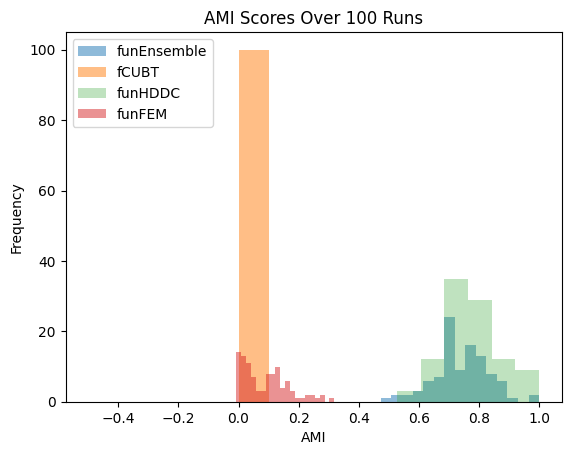

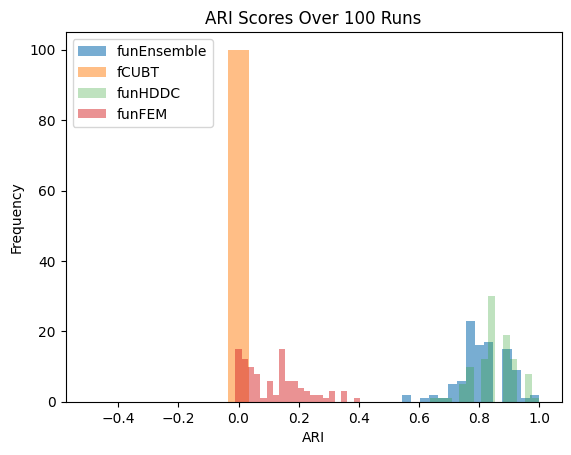

In [27]:
# Plot each AMI result in a histogram
plt.hist(AMI_funensemble, bins=15, alpha=0.5, label='funEnsemble')
plt.hist(AMI_fCUBT, bins=10, alpha=0.5, label='fCUBT')
plt.hist(AMI_funHDDC, bins=6, alpha=0.3, label='funHDDC')
plt.hist(AMI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('AMI Scores Over 100 Runs')
plt.xlabel('AMI')
plt.ylabel('Frequency')
plt.show()

# Plot each ARI result in a histogram
plt.hist(ARI_funensemble, bins=15, alpha=0.6, label='funEnsemble')
plt.hist(ARI_fCUBT, bins=15, alpha=0.5, label='fCUBT')
plt.hist(ARI_funHDDC, bins=15, alpha=0.3, label='funHDDC')
plt.hist(ARI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('ARI Scores Over 100 Runs')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()


In [28]:
runs = 100

AMI_funensemble, ARI_funensemble, AMI_fCUBT, ARI_fCUBT, AMI_funFEM, ARI_funFEM, AMI_funHDDC, ARI_funHDDC = [], [], [], [], [], [], [], []

for i in range(runs):
    
    # Get data from the first simulation
    Y, simulation_label = scenario_four_simulate()

    # Dimension selection
    variance, ami, ari, v_range = fr.percentage_variation_ami_ari(10, Y, 150, simulation_label, 2)
    dimension = eigen_dimension_selection(variance)	

    # funEnsemble
    data_smooth, mean, principal_componenets, eigen_functions = ec.functional_data_decomposition (Y, dimension, 150)
    membership_matrices, labels = ec.functional_data_clustering (principal_componenets, 2)
    # Append the AMI and ARI to the array
    AMI_funensemble = np.append(AMI_funensemble, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funensemble = np.append(ARI_funensemble, adjusted_rand_score(simulation_label, labels))

    # fCUBT
    data = DenseFunctionalData(t, Y)
    # Build the tree
    root_node = Node(data, is_root=True)
    fcubt = FCUBT(root_node=root_node)
    # Growing
    fcubt.grow(n_components=0.95, min_size=10)
    # Joining
    fcubt.join(n_components=0.95)
    # Append the AMI and ARI to the array
    AMI_fCUBT = np.append(AMI_fCUBT, adjusted_mutual_info_score(simulation_label, fcubt.labels_join))
    ARI_fCUBT = np.append(ARI_fCUBT, adjusted_rand_score(simulation_label, fcubt.labels_join))

    # funHDDC
    # Store the data in DataStore.csv
    np.savetxt('../Data/DataStore.csv', Y, delimiter=',') 
    # Load data
    %R argvals <- seq(0, 1, length.out = 30)
    %R values <- t(as.matrix(read.csv('~/ProjectDocs/Project_code/simuations/Data/DataStore.csv', header = FALSE))) # nolint
    # FunHDDC
    %R basis <- create.bspline.basis(rangeval = c(min(argvals), max(argvals)), nbasis = 25, norder = 3) # nolint
    %R data_fd <- smooth.basis(argvals = argvals, y = values, fdParobj = basis)$fd
    %R res_clust <- funHDDC(data_fd, K = 2, threshold = 0.3, model = 'ABQkDk', itermax = 2000, eps = 1e-3, init = 'kmeans') # nolint
    %R pred_labels <- res_clust$class
    # Write the pred_labels to a file
    %R write.csv(pred_labels, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read Labels from PredictedLabels.csv, ignoring the header and the first column
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=1)
    # Append the AMI and ARI to the array
    AMI_funHDDC = np.append(AMI_funHDDC, adjusted_mutual_info_score(simulation_label, predicted_labels))
    ARI_funHDDC = np.append(ARI_funHDDC, adjusted_rand_score(simulation_label, predicted_labels))

    # FunFEM
    %R res_clust = try(funFEM(data_fd,K=2)) # nolint # nolint: commas_linter.
    %R try(pred_labels_fem <- res_clust$P) # nolint
    # Write the pred_labels to a file
    %R write.csv(pred_labels_fem, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read labels from PredictedLabels.csv, ignoring the header and the first column and getting the first four columns
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=range(1, 3))
    #   Format the labels
    labels = np.zeros(len(predicted_labels))
    for i in range(len(predicted_labels)):
        labels[i] = np.argmax(predicted_labels[i])
    # Append the AMI and ARI to the array
    AMI_funFEM = np.append(AMI_funFEM, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funFEM = np.append(ARI_funFEM, adjusted_rand_score(simulation_label, labels))
    

    # Say that the run is done
    print("--------------- FINISHED RUN ---------------")

   model K threshold complexity         BIC
1 ABQKDK 2       0.3        380 -309,298.47

SELECTED: model  ABQKDK  with  2  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 2       0.3        317 -186,195.41

SELECTED: model  ABQKDK  with  2  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 2       0.3        311 -210,695.40

SELECTED: model  ABQKDK  with  2  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 2       0.3        372 -279,848.63

SELECTED: model  ABQKDK  with  2  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 2       0.3        426 -396,806.05

SELECTED: model  ABQKDK  with  2  clusters.
Selection Criterion: BIC.
--------------- FINISHED 

In [29]:
# Print the average AMI and ARI, rounded to 2
print("Average AMI funEnsemble: ", round(np.mean(AMI_funensemble), 2))
print("Average ARI funEnsemble: ", round(np.mean(ARI_funensemble), 2))
print("Average AMI fCUBT: ", round(np.mean(AMI_fCUBT), 2))
print("Average ARI fCUBT: ", round(np.mean(ARI_fCUBT), 2))
print("Average AMI funHDDC: ", round(np.mean(AMI_funHDDC), 2))
print("Average ARI funHDDC: ", round(np.mean(ARI_funHDDC), 2))
print("Average AMI funFEM: ", round(np.mean(AMI_funFEM), 2))
print("Average ARI funFEM: ", round(np.mean(ARI_funFEM), 2))# Print the average AMI and ARI, rounded to 2


Average AMI funEnsemble:  0.98
Average ARI funEnsemble:  0.99
Average AMI fCUBT:  0.89
Average ARI fCUBT:  0.91
Average AMI funHDDC:  0.99
Average ARI funHDDC:  0.99
Average AMI funFEM:  0.14
Average ARI funFEM:  0.16


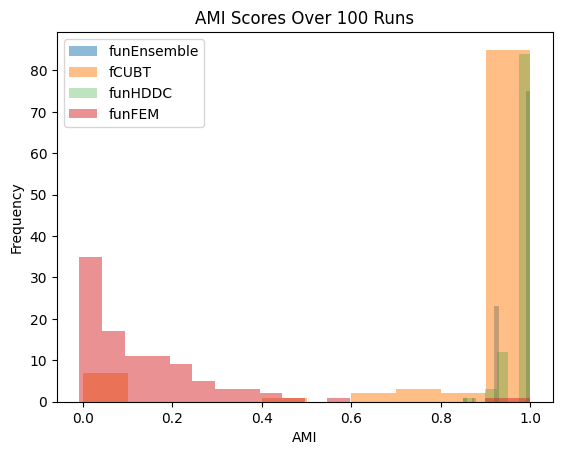

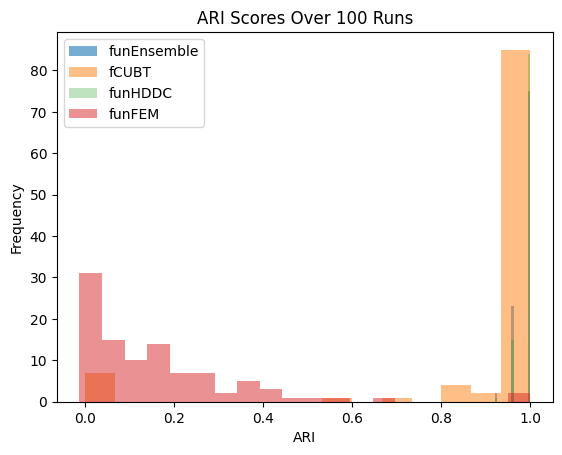

In [30]:
# Plot each AMI result in a histogram
plt.hist(AMI_funensemble, bins=15, alpha=0.5, label='funEnsemble')
plt.hist(AMI_fCUBT, bins=10, alpha=0.5, label='fCUBT')
plt.hist(AMI_funHDDC, bins=6, alpha=0.3, label='funHDDC')
plt.hist(AMI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('AMI Scores Over 100 Runs')
plt.xlabel('AMI')
plt.ylabel('Frequency')
plt.show()

# Plot each ARI result in a histogram
plt.hist(ARI_funensemble, bins=15, alpha=0.6, label='funEnsemble')
plt.hist(ARI_fCUBT, bins=15, alpha=0.5, label='fCUBT')
plt.hist(ARI_funHDDC, bins=15, alpha=0.3, label='funHDDC')
plt.hist(ARI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('ARI Scores Over 100 Runs')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()


In [31]:
runs = 100

AMI_funensemble, ARI_funensemble, AMI_fCUBT, ARI_fCUBT, AMI_funFEM, ARI_funFEM, AMI_funHDDC, ARI_funHDDC = [], [], [], [], [], [], [], []

for i in range(runs):
    
    # Get data from the first simulation
    Y, simulation_label = scenario_seven_simulate()

    # Dimension selection
    variance, ami, ari, v_range = fr.percentage_variation_ami_ari(10, Y, 150, simulation_label, 3)
    dimension = eigen_dimension_selection(variance)	

    # funEnsemble
    data_smooth, mean, principal_componenets, eigen_functions = ec.functional_data_decomposition (Y, dimension, 150)
    membership_matrices, labels = ec.functional_data_clustering (principal_componenets, 3)
    # Append the AMI and ARI to the array
    AMI_funensemble = np.append(AMI_funensemble, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funensemble = np.append(ARI_funensemble, adjusted_rand_score(simulation_label, labels))

    # fCUBT
    data = DenseFunctionalData(t, Y)
    # Build the tree
    root_node = Node(data, is_root=True)
    fcubt = FCUBT(root_node=root_node)
    # Growing
    fcubt.grow(n_components=0.95, min_size=10)
    # Joining
    fcubt.join(n_components=0.95)
    # Append the AMI and ARI to the array
    AMI_fCUBT = np.append(AMI_fCUBT, adjusted_mutual_info_score(simulation_label, fcubt.labels_join))
    ARI_fCUBT = np.append(ARI_fCUBT, adjusted_rand_score(simulation_label, fcubt.labels_join))

    # funHDDC
    # Store the data in DataStore.csv
    np.savetxt('../Data/DataStore.csv', Y, delimiter=',') 
    # Load data
    %R argvals <- seq(0, 1, length.out = 30)
    %R values <- t(as.matrix(read.csv('~/ProjectDocs/Project_code/simuations/Data/DataStore.csv', header = FALSE))) # nolint
    # FunHDDC
    %R basis <- create.bspline.basis(rangeval = c(min(argvals), max(argvals)), nbasis = 25, norder = 3) # nolint
    %R data_fd <- smooth.basis(argvals = argvals, y = values, fdParobj = basis)$fd
    %R res_clust <- funHDDC(data_fd, K = 3, threshold = 0.3, model = 'ABQkDk', itermax = 2000, eps = 1e-3, init = 'kmeans') # nolint
    %R pred_labels <- res_clust$class
    # Write the pred_labels to a file
    %R write.csv(pred_labels, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read Labels from PredictedLabels.csv, ignoring the header and the first column
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=1)
    # Append the AMI and ARI to the array
    AMI_funHDDC = np.append(AMI_funHDDC, adjusted_mutual_info_score(simulation_label, predicted_labels))
    ARI_funHDDC = np.append(ARI_funHDDC, adjusted_rand_score(simulation_label, predicted_labels))

    # FunFEM
    %R res_clust = try(funFEM(data_fd,K=3)) # nolint # nolint: commas_linter.
    %R try(pred_labels_fem <- res_clust$P) # nolint
    # Write the pred_labels to a file
    %R write.csv(pred_labels_fem, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read labels from PredictedLabels.csv, ignoring the header and the first column and getting the first four columns
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=range(1, 4))
    #   Format the labels
    labels = np.zeros(len(predicted_labels))
    for i in range(len(predicted_labels)):
        labels[i] = np.argmax(predicted_labels[i])
    # Append the AMI and ARI to the array
    AMI_funFEM = np.append(AMI_funFEM, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funFEM = np.append(ARI_funFEM, adjusted_rand_score(simulation_label, labels))
    

    # Say that the run is done
    print("--------------- FINISHED RUN ---------------")

   model K threshold complexity         BIC
1 ABQKDK 3       0.3        581 -462,454.58

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        361 -158,596.60

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        379 -153,686.68

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        454 -161,847.36

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        475 -235,020.65

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED 

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 3) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        490 -287,902.63

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        322 -145,813.21

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        262 -144,686.15

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        301 -148,488.50

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        502 -286,458.29

SELECTED: model  ABQKDK  with  3  clusters.
Select

In [32]:
# Print the average AMI and ARI, rounded to 2
print("Average AMI funEnsemble: ", round(np.mean(AMI_funensemble), 2))
print("Average ARI funEnsemble: ", round(np.mean(ARI_funensemble), 2))
print("Average AMI fCUBT: ", round(np.mean(AMI_fCUBT), 2))
print("Average ARI fCUBT: ", round(np.mean(ARI_fCUBT), 2))
print("Average AMI funHDDC: ", round(np.mean(AMI_funHDDC), 2))
print("Average ARI funHDDC: ", round(np.mean(ARI_funHDDC), 2))
print("Average AMI funFEM: ", round(np.mean(AMI_funFEM), 2))
print("Average ARI funFEM: ", round(np.mean(ARI_funFEM), 2))# Print the average AMI and ARI, rounded to 2


Average AMI funEnsemble:  0.94
Average ARI funEnsemble:  0.95
Average AMI fCUBT:  0.8
Average ARI fCUBT:  0.77
Average AMI funHDDC:  0.83
Average ARI funHDDC:  0.75
Average AMI funFEM:  0.73
Average ARI funFEM:  0.66


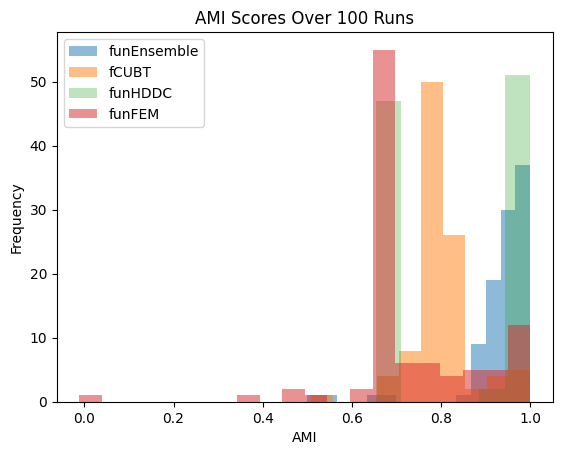

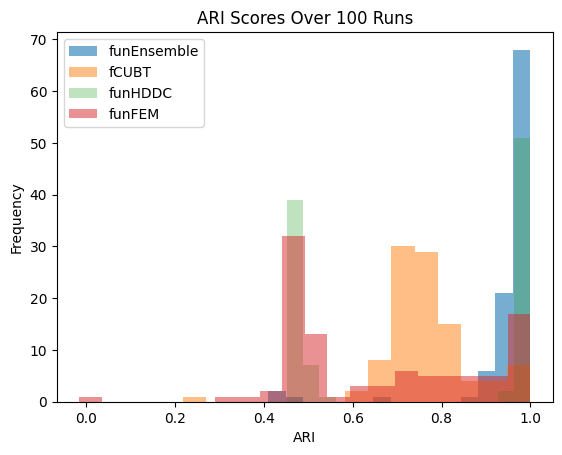

In [33]:
# Plot each AMI result in a histogram
plt.hist(AMI_funensemble, bins=15, alpha=0.5, label='funEnsemble')
plt.hist(AMI_fCUBT, bins=10, alpha=0.5, label='fCUBT')
plt.hist(AMI_funHDDC, bins=6, alpha=0.3, label='funHDDC')
plt.hist(AMI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('AMI Scores Over 100 Runs')
plt.xlabel('AMI')
plt.ylabel('Frequency')
plt.show()

# Plot each ARI result in a histogram
plt.hist(ARI_funensemble, bins=15, alpha=0.6, label='funEnsemble')
plt.hist(ARI_fCUBT, bins=15, alpha=0.5, label='fCUBT')
plt.hist(ARI_funHDDC, bins=15, alpha=0.3, label='funHDDC')
plt.hist(ARI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('ARI Scores Over 100 Runs')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()


In [34]:
runs = 100

AMI_funensemble, ARI_funensemble, AMI_fCUBT, ARI_fCUBT, AMI_funFEM, ARI_funFEM, AMI_funHDDC, ARI_funHDDC = [], [], [], [], [], [], [], []

for i in range(runs):
    
    # Get data from the first simulation
    Y, simulation_label = scenario_eight_simulate()

    # Dimension selection
    variance, ami, ari, v_range = fr.percentage_variation_ami_ari(10, Y, 150, simulation_label, 3)
    dimension = eigen_dimension_selection(variance)	

    # funEnsemble
    data_smooth, mean, principal_componenets, eigen_functions = ec.functional_data_decomposition (Y, dimension, 150)
    membership_matrices, labels = ec.functional_data_clustering (principal_componenets, 3)
    # Append the AMI and ARI to the array
    AMI_funensemble = np.append(AMI_funensemble, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funensemble = np.append(ARI_funensemble, adjusted_rand_score(simulation_label, labels))

    # fCUBT
    data = DenseFunctionalData(t, Y)
    # Build the tree
    root_node = Node(data, is_root=True)
    fcubt = FCUBT(root_node=root_node)
    # Growing
    fcubt.grow(n_components=0.95, min_size=10)
    # Joining
    fcubt.join(n_components=0.95)
    # Append the AMI and ARI to the array
    AMI_fCUBT = np.append(AMI_fCUBT, adjusted_mutual_info_score(simulation_label, fcubt.labels_join))
    ARI_fCUBT = np.append(ARI_fCUBT, adjusted_rand_score(simulation_label, fcubt.labels_join))

    # funHDDC
    # Store the data in DataStore.csv
    np.savetxt('../Data/DataStore.csv', Y, delimiter=',') 
    # Load data
    %R argvals <- seq(0, 1, length.out = 30)
    %R values <- t(as.matrix(read.csv('~/ProjectDocs/Project_code/simuations/Data/DataStore.csv', header = FALSE))) # nolint
    # FunHDDC
    %R basis <- create.bspline.basis(rangeval = c(min(argvals), max(argvals)), nbasis = 25, norder = 3) # nolint
    %R data_fd <- smooth.basis(argvals = argvals, y = values, fdParobj = basis)$fd
    %R res_clust <- funHDDC(data_fd, K = 3, threshold = 0.3, model = 'ABQkDk', itermax = 2000, eps = 1e-3, init = 'kmeans') # nolint
    %R pred_labels <- res_clust$class
    # Write the pred_labels to a file
    %R write.csv(pred_labels, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read Labels from PredictedLabels.csv, ignoring the header and the first column
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=1)
    # Append the AMI and ARI to the array
    AMI_funHDDC = np.append(AMI_funHDDC, adjusted_mutual_info_score(simulation_label, predicted_labels))
    ARI_funHDDC = np.append(ARI_funHDDC, adjusted_rand_score(simulation_label, predicted_labels))

    # FunFEM
    %R res_clust = try(funFEM(data_fd,K=3)) # nolint # nolint: commas_linter.
    %R try(pred_labels_fem <- res_clust$P) # nolint
    # Write the pred_labels to a file
    %R write.csv(pred_labels_fem, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read labels from PredictedLabels.csv, ignoring the header and the first column and getting the first four columns
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=range(1, 4))
    #   Format the labels
    labels = np.zeros(len(predicted_labels))
    for i in range(len(predicted_labels)):
        labels[i] = np.argmax(predicted_labels[i])
    # Append the AMI and ARI to the array
    AMI_funFEM = np.append(AMI_funFEM, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funFEM = np.append(ARI_funFEM, adjusted_rand_score(simulation_label, labels))
    

    # Say that the run is done
    print("--------------- FINISHED RUN ---------------")

   model K threshold complexity         BIC
1 ABQKDK 3       0.3        297 -220,872.73

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        479 -308,232.87

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        690 -457,020.09

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        476 -381,937.79

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        336 -251,602.16

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED 

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 3) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        576 -466,850.19

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        322 -207,757.16

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 3) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        196 -195,697.18

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        219 -205,478.75

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        219 -201,879.58

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        666 -606,668.80

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        620 -443,351.28

SELECTED: model  ABQKDK  with  3  clusters.
Select

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 3) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        605 -514,639.24

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        459 -293,772.74

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        507 -410,614.72

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        322 -232,892.36

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        340 -268,165.01

SELECTED: model  ABQKDK  with  3  clusters.
Select

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 3) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        197 -197,749.81

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        174 -181,822.30

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        297 -219,667.31

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        274 -194,450.88

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        577 -428,003.63

SELECTED: model  ABQKDK  with  3  clusters.
Select

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 3) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        527 -301,335.67

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        626 -380,612.25

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        648 -693,872.15

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        260 -171,580.13

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        151 -179,272.29

SELECTED: model  ABQKDK  with  3  clusters.
Select

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 3) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        655 -705,388.84

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        305 -217,478.84

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        447 -277,497.26

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        301 -204,000.21

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        590 -563,182.84

SELECTED: model  ABQKDK  with  3  clusters.
Select

R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: Error in funFEM(data_fd, K = 3) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        340 -193,720.09

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 3       0.3        594 -426,589.58

SELECTED: model  ABQKDK  with  3  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------


In [35]:
# Print the average AMI and ARI, rounded to 2
print("Average AMI funEnsemble: ", round(np.mean(AMI_funensemble), 2))
print("Average ARI funEnsemble: ", round(np.mean(ARI_funensemble), 2))
print("Average AMI fCUBT: ", round(np.mean(AMI_fCUBT), 2))
print("Average ARI fCUBT: ", round(np.mean(ARI_fCUBT), 2))
print("Average AMI funHDDC: ", round(np.mean(AMI_funHDDC), 2))
print("Average ARI funHDDC: ", round(np.mean(ARI_funHDDC), 2))
print("Average AMI funFEM: ", round(np.mean(AMI_funFEM), 2))
print("Average ARI funFEM: ", round(np.mean(ARI_funFEM), 2))# Print the average AMI and ARI, rounded to 2


Average AMI funEnsemble:  0.84
Average ARI funEnsemble:  0.83
Average AMI fCUBT:  0.82
Average ARI fCUBT:  0.88
Average AMI funHDDC:  0.83
Average ARI funHDDC:  0.84
Average AMI funFEM:  0.22
Average ARI funFEM:  0.16


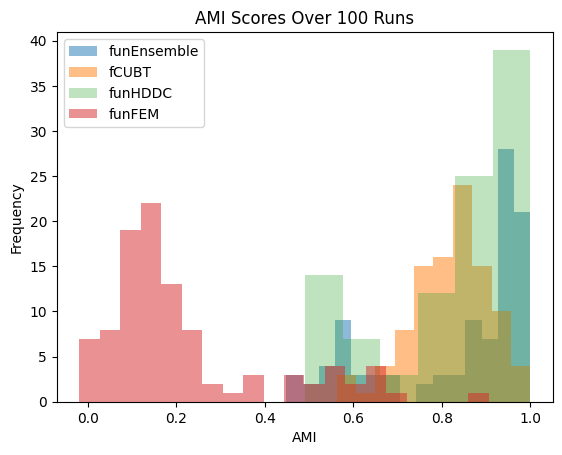

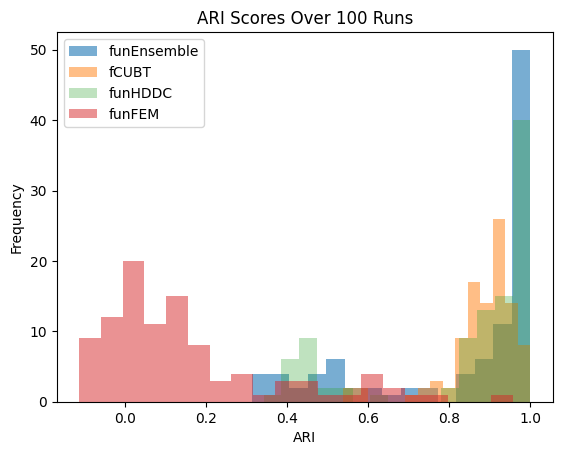

In [36]:
# Plot each AMI result in a histogram
plt.hist(AMI_funensemble, bins=15, alpha=0.5, label='funEnsemble')
plt.hist(AMI_fCUBT, bins=10, alpha=0.5, label='fCUBT')
plt.hist(AMI_funHDDC, bins=6, alpha=0.3, label='funHDDC')
plt.hist(AMI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('AMI Scores Over 100 Runs')
plt.xlabel('AMI')
plt.ylabel('Frequency')
plt.show()

# Plot each ARI result in a histogram
plt.hist(ARI_funensemble, bins=15, alpha=0.6, label='funEnsemble')
plt.hist(ARI_fCUBT, bins=15, alpha=0.5, label='fCUBT')
plt.hist(ARI_funHDDC, bins=15, alpha=0.3, label='funHDDC')
plt.hist(ARI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('ARI Scores Over 100 Runs')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()


In [40]:
runs = 4

AMI_funensemble, ARI_funensemble, AMI_fCUBT, ARI_fCUBT, AMI_funFEM, ARI_funFEM, AMI_funHDDC, ARI_funHDDC = [], [], [], [], [], [], [], []

for i in range(runs):
    
    # Get data from the first simulation
    Y, simulation_label = scenario_six_simulate()

    # Dimension selection
    variance, ami, ari, v_range = fr.percentage_variation_ami_ari(10, Y, 150, simulation_label, 6)
    dimension = eigen_dimension_selection(variance)	

    # funEnsemble
    data_smooth, mean, principal_componenets, eigen_functions = ec.functional_data_decomposition (Y, dimension, 150)
    membership_matrices, labels = ec.functional_data_clustering (principal_componenets, 6)
    # Append the AMI and ARI to the array
    AMI_funensemble = np.append(AMI_funensemble, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funensemble = np.append(ARI_funensemble, adjusted_rand_score(simulation_label, labels))

    # fCUBT
    data = DenseFunctionalData(t, Y)
    # Build the tree
    root_node = Node(data, is_root=True)
    fcubt = FCUBT(root_node=root_node)
    # Growing
    fcubt.grow(n_components=0.95, min_size=10)
    # Joining
    fcubt.join(n_components=0.95)
    # Append the AMI and ARI to the array
    AMI_fCUBT = np.append(AMI_fCUBT, adjusted_mutual_info_score(simulation_label, fcubt.labels_join))
    ARI_fCUBT = np.append(ARI_fCUBT, adjusted_rand_score(simulation_label, fcubt.labels_join))

    # funHDDC
    # Store the data in DataStore.csv
    np.savetxt('../Data/DataStore.csv', Y, delimiter=',') 
    # Load data
    %R argvals <- seq(0, 1, length.out = 30)
    %R values <- t(as.matrix(read.csv('~/ProjectDocs/Project_code/simuations/Data/DataStore.csv', header = FALSE))) # nolint
    # FunHDDC
    %R basis <- create.bspline.basis(rangeval = c(min(argvals), max(argvals)), nbasis = 25, norder = 3) # nolint
    %R data_fd <- smooth.basis(argvals = argvals, y = values, fdParobj = basis)$fd
    %R res_clust <- funHDDC(data_fd, K = 6, threshold = 0.3, model = 'ABQkDk', itermax = 2000, eps = 1e-3, init = 'kmeans') # nolint
    %R pred_labels <- res_clust$class
    # Write the pred_labels to a file
    %R write.csv(pred_labels, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read Labels from PredictedLabels.csv, ignoring the header and the first column
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=1)
    # Append the AMI and ARI to the array
    AMI_funHDDC = np.append(AMI_funHDDC, adjusted_mutual_info_score(simulation_label, predicted_labels))
    ARI_funHDDC = np.append(ARI_funHDDC, adjusted_rand_score(simulation_label, predicted_labels))

    # FunFEM
    %R res_clust = try(funFEM(data_fd,K=6)) # nolint # nolint: commas_linter.
    %R try(pred_labels_fem <- res_clust$P) # nolint
    # Write the pred_labels to a file
    %R write.csv(pred_labels_fem, file = '~/ProjectDocs/Project_code/simuations/Data/PredictedLabelsStore.csv') # nolint
    # Read labels from PredictedLabels.csv, ignoring the header and the first column and getting the first four columns
    predicted_labels = np.genfromtxt('../Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=range(1, 7))
    #   Format the labels
    labels = np.zeros(len(predicted_labels))
    for i in range(len(predicted_labels)):
        labels[i] = np.argmax(predicted_labels[i])
    # Append the AMI and ARI to the array
    AMI_funFEM = np.append(AMI_funFEM, adjusted_mutual_info_score(simulation_label, labels))
    ARI_funFEM = np.append(ARI_funFEM, adjusted_rand_score(simulation_label, labels))
    

    # Say that the run is done
    print("--------------- FINISHED RUN ---------------")

   model K threshold complexity         BIC
1 ABQKDK 6       0.3      1,019 -449,770.63

SELECTED: model  ABQKDK  with  6  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 6       0.3      1,166 -756,104.46

SELECTED: model  ABQKDK  with  6  clusters.
Selection Criterion: BIC.


R[write to console]: Error in .fstep(fd, T, lambda) : One cluster is almost empty!

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In funHDDC(data_fd, K = 6, threshold = 0.3, model = "ABQkDk", itermax = 2000,  :
R[write to console]: 
 
R[write to console]:  All models diverged.

R[write to console]: Error in funFEM(data_fd, K = 6) : 
  No reliable results to return (empty clusters in all partitions)!

R[write to console]: Error in res_clust$P : $ operator is invalid for atomic vectors



--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 6       0.3        588 -654,639.41

SELECTED: model  ABQKDK  with  6  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------
   model K threshold complexity         BIC
1 ABQKDK 6       0.3      1,041 -489,418.03

SELECTED: model  ABQKDK  with  6  clusters.
Selection Criterion: BIC.
--------------- FINISHED RUN ---------------


In [41]:
# Print the average AMI and ARI, rounded to 2
print("Average AMI funEnsemble: ", round(np.mean(AMI_funensemble), 2))
print("Average ARI funEnsemble: ", round(np.mean(ARI_funensemble), 2))
print("Average AMI fCUBT: ", round(np.mean(AMI_fCUBT), 2))
print("Average ARI fCUBT: ", round(np.mean(ARI_fCUBT), 2))
print("Average AMI funHDDC: ", round(np.mean(AMI_funHDDC), 2))
print("Average ARI funHDDC: ", round(np.mean(ARI_funHDDC), 2))
print("Average AMI funFEM: ", round(np.mean(AMI_funFEM), 2))
print("Average ARI funFEM: ", round(np.mean(ARI_funFEM), 2))# Print the average AMI and ARI, rounded to 2


Average AMI funEnsemble:  0.81
Average ARI funEnsemble:  0.7
Average AMI fCUBT:  0.88
Average ARI fCUBT:  0.81
Average AMI funHDDC:  0.79
Average ARI funHDDC:  0.58
Average AMI funFEM:  0.56
Average ARI funFEM:  0.4


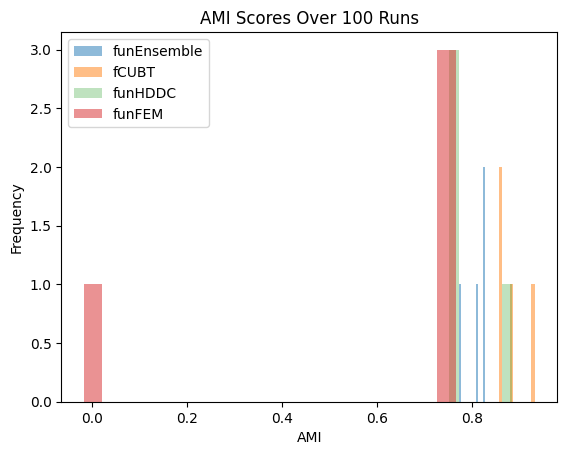

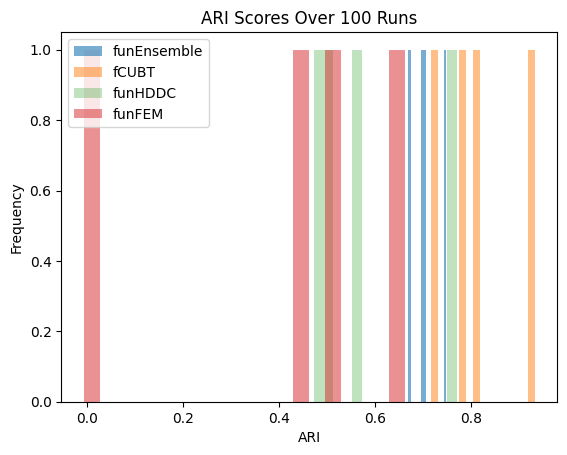

In [42]:
# Plot each AMI result in a histogram
plt.hist(AMI_funensemble, bins=15, alpha=0.5, label='funEnsemble')
plt.hist(AMI_fCUBT, bins=10, alpha=0.5, label='fCUBT')
plt.hist(AMI_funHDDC, bins=6, alpha=0.3, label='funHDDC')
plt.hist(AMI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('AMI Scores Over 100 Runs')
plt.xlabel('AMI')
plt.ylabel('Frequency')
plt.show()

# Plot each ARI result in a histogram
plt.hist(ARI_funensemble, bins=15, alpha=0.6, label='funEnsemble')
plt.hist(ARI_fCUBT, bins=15, alpha=0.5, label='fCUBT')
plt.hist(ARI_funHDDC, bins=15, alpha=0.3, label='funHDDC')
plt.hist(ARI_funFEM, bins=20, alpha=0.5, label='funFEM')
plt.legend(loc='upper left')
plt.title('ARI Scores Over 100 Runs')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()
